In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
import copy
from six import StringIO
from IPython.display import Image  
import pydotplus
import statsmodels.api as sm
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns

In [3]:
tobacco = pd.read_csv('tobacco_use_and_legislation_ww.csv', usecols=range(1, 12))
print(tobacco)
tobacco.Location.unique()

     Location  Period  Monitor  Protect from tobacco smoke  \
0     Albania    2018        2                           5   
1     Albania    2016        2                           5   
2     Albania    2014        2                           5   
3     Albania    2010        3                           5   
4     Algeria    2018        3                           3   
..        ...     ...      ...                         ...   
587    Zambia    2010        1                           4   
588  Zimbabwe    2018        2                           3   
589  Zimbabwe    2016        2                           3   
590  Zimbabwe    2014        2                           3   
591  Zimbabwe    2010        2                           3   

     Offer help to quit tobacco use  Warn about the dangers of tobacco  \
0                                 4                                  4   
1                                 4                                  4   
2                                

array(['Albania', 'Algeria', 'Andorra', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea", 'Denmark',
       'Dominican Republic', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guyana', 'Haiti',
       'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'L

In [4]:
newtobacco = pd.DataFrame(index=range(tobacco.Location.unique().size), columns=tobacco.columns.drop(['Period']))
count = 0
for country in list(np.unique(tobacco.Location.to_numpy())):
    parentcountry = tobacco[tobacco['Location'] == country].ParentLocation.tolist()[0]
    temp = tobacco[tobacco['Location'] == country].drop(['Location', 'Period', 'ParentLocation'], axis = 1)
    countrystd = temp.std(axis=0).to_list()
    countrystd.insert(0, country)
    countrystd.append(parentcountry)
    newtobacco.iloc[count, :] = countrystd
    count += 1
newtobacco

,Location,Monitor,Protect from tobacco smoke,Offer help to quit tobacco use,Warn about the dangers of tobacco,Enforce bans on tobacco advertising,Anti-tobacco mass media campaigns,Price,Usage,ParentLocation
0,Albania,0.5,0.0,0.5,0.0,0.0,1.414214,6.612803,0.805709,Europe
1,Algeria,0.57735,0.0,0.0,0.0,0.0,0.57735,6.767754,0.512348,Africa
2,Andorra,0.57735,0.5,0.0,0.0,0.0,0.5,9.201087,0.403113,Europe
3,Argentina,0.5,1.5,0.0,1.5,1.0,0.5,5.298427,3.571531,Americas
4,Armenia,0.0,0.0,0.5,0.957427,0.0,1.414214,6.257262,1.410378,Europe
...,...,...,...,...,...,...,...,...,...,...
143,Uzbekistan,0.0,0.0,0.5,0.0,1.0,0.5,6.513576,0.65,Europe
144,Vanuatu,0.57735,0.0,0.0,1.0,0.0,0.5,2.996665,1.332604,Western Pacific
145,Yemen,0.0,1.0,0.0,0.5,0.5,0.5,1.44453,1.547848,Eastern Mediterranean
146,Zambia,0.5,0.0,0.5,0.0,0.0,1.5,3.075169,0.853913,Africa


In [209]:
newtobacco.drop(['Location','ParentLocation'], axis=1).mean(axis=0)
# newtobacco.drop('Location', axis=1).plot(subplots=True)

Monitor                                0.371703
Protect from tobacco smoke             0.342358
Offer help to quit tobacco use         0.293652
Warn about the dangers of tobacco      0.596275
Enforce bans on tobacco advertising    0.270773
Anti-tobacco mass media campaigns      1.033693
Price                                  4.926539
Usage                                  1.438712
dtype: float64

In [5]:
newtobaccofinal = pd.DataFrame(index=range(tobacco.Location.unique().size), columns=tobacco.columns.drop(['Period']))
count = 0
for country in list(np.unique(tobacco.Location.to_numpy())):
    parentcountry = tobacco[tobacco['Location'] == country].ParentLocation.tolist()[0]
    temp = tobacco[tobacco['Location'] == country]
    countryrow = temp.drop(['Location', 'Period', 'Price','Usage','ParentLocation'], axis = 1).mean(axis=0).to_list()
    price = temp.iloc[0].Price - temp.iloc[len(temp)-1].Price
    usage = temp.iloc[0].Usage - temp.iloc[len(temp)-1].Usage
    countryrow.insert(0, country)
    countryrow.append(price)
    countryrow.append(usage)
    countryrow.append(parentcountry)
    newtobaccofinal.iloc[count, :] = countryrow
    count += 1
newtobaccofinal
newtobaccofinal.to_csv('save.csv')

[1.028524774774775, 1.7476103603603605, 2.689863577863578, 3.1741179751179756, 3.3108107035607035, 3.9114790826665833, 3.9765716365091373, 4.1060117836367835, 4.259808876183877, 4.391550028050029, 4.532465405978564, 4.831305059523809, 4.831305059523809, 5.09738446528425, 5.097384465284249, 5.127598520503263, 5.127598520503263, 5.127598520503263, 5.127598520503263, 5.129170463875205, 5.139382005173704, 5.20448620819095, 5.20448620819095]


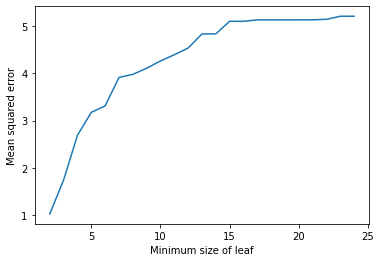

In [308]:
x = newtobaccofinal[newtobaccofinal.columns.drop(['Location', 'Usage', 'ParentLocation'])]
y = newtobaccofinal['Usage']
criteria = range(2, 25)
accuracies = []
for i in range(len(criteria)):
    reg = DecisionTreeRegressor(min_samples_leaf=criteria[i])
    reg.fit(x, y)
    ypred = reg.predict(x)
    accuracies.append(mean_squared_error(y, ypred))
plt.plot(criteria, accuracies)
plt.xlabel('Minimum size of leaf')
plt.ylabel('Mean squared error')
print(accuracies)

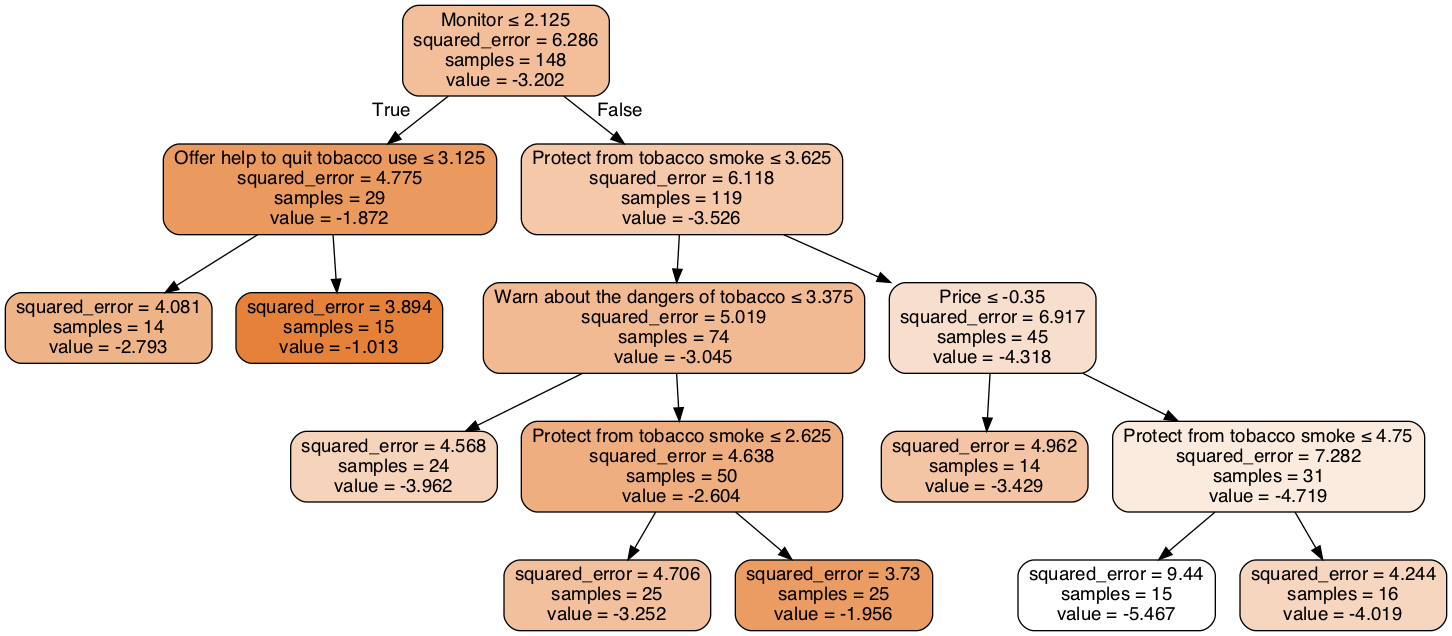

In [312]:
# regmse = DecisionTreeRegressor(min_samples_split=43, min_samples_leaf=2, criterion='squared_error')
# regmse.fit(x, y)

# dot_data = StringIO()
# export_graphviz(regmse, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = x.columns.to_list())
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('smokingdecisiontree_se.png')
# Image(graph.create_png())

regmse2 = DecisionTreeRegressor(min_samples_leaf=14, criterion='squared_error')
regmse2.fit(x, y)

dot_data = StringIO()
export_graphviz(regmse2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns.to_list())
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('smokingdecisiontree_se2.png')
Image(graph.create_png())


# reg2 = DecisionTreeRegressor(min_samples_split=43, min_samples_leaf=2, criterion='friedman_mse')
# reg2.fit(x, y)

# dot_data = StringIO()
# export_graphviz(reg2, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = x.columns.to_list())
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('smokingdecisiontree_fmse.png')
# Image(graph.create_png())

In [313]:
resultsdict = {}
leaves = regmse2.apply(x)
leavesuniq = list(np.unique(leaves))
for i in range(len(newtobaccofinal)):
    indexleaf = leavesuniq.index(leaves[i])
    if(indexleaf not in resultsdict):
        resultsdict[indexleaf] = [i]
    else:
        resultsdict[indexleaf].append(i)
resultsdict

{7: [0, 5, 24, 28, 40, 60, 62, 83, 94, 99, 103, 118, 125, 129, 134, 139],
 2: [1,
  7,
  8,
  16,
  27,
  29,
  34,
  44,
  54,
  61,
  63,
  66,
  69,
  80,
  87,
  89,
  100,
  102,
  117,
  124,
  130,
  133,
  135,
  140],
 1: [2, 9, 15, 30, 37, 45, 52, 75, 82, 88, 90, 96, 143, 146, 147],
 6: [3, 17, 22, 26, 31, 32, 35, 58, 72, 79, 84, 92, 111, 115, 137],
 4: [4,
  23,
  33,
  36,
  46,
  50,
  56,
  59,
  67,
  70,
  71,
  73,
  77,
  86,
  104,
  105,
  106,
  109,
  110,
  116,
  120,
  121,
  123,
  131,
  132],
 3: [6,
  10,
  12,
  13,
  38,
  43,
  47,
  48,
  51,
  57,
  64,
  68,
  78,
  81,
  85,
  93,
  98,
  107,
  108,
  122,
  127,
  128,
  138,
  141,
  144],
 5: [11, 14, 18, 19, 41, 53, 65, 74, 97, 101, 113, 126, 136, 142],
 0: [20, 21, 25, 39, 42, 49, 55, 76, 91, 95, 112, 114, 119, 145]}

In [315]:
population = pd.read_csv('country_population.csv')
population

,Country Name,Country Code,Population
0,Aruba,ABW,106766.0
1,Africa Eastern and Southern,AFE,677243299.0
2,Afghanistan,AFG,38928341.0
3,Africa Western and Central,AFW,458803476.0
4,Angola,AGO,32866268.0
...,...,...,...
261,Kosovo,XKX,1775378.0
262,Yemen,YEM,29825968.0
263,South Africa,ZAF,59308690.0
264,Zambia,ZMB,18383956.0


In [317]:
for key in resultsdict.keys():
    poptemp = population[population['Country Name'].isin(newtobaccofinal.iloc[resultsdict[key]].Location)]
    print(population.iloc[poptemp['Population'].idxmax()])

Country Name       Pakistan
Country Code            PAK
Population      220892331.0
Name: 184, dtype: object
Country Name           China
Country Code             CHN
Population      1402112000.0
Name: 40, dtype: object
Country Name        Nigeria
Country Code            NGA
Population      206139587.0
Name: 174, dtype: object
Country Name           India
Country Code             IND
Population      1380004385.0
Name: 109, dtype: object
Country Name      Indonesia
Country Code            IDN
Population      273523621.0
Name: 106, dtype: object
Country Name    United States of America
Country Code                         USA
Population                   329484123.0
Name: 251, dtype: object
Country Name        Uganda
Country Code           UGA
Population      45741000.0
Name: 247, dtype: object
Country Name         Yemen
Country Code           YEM
Population      29825968.0
Name: 262, dtype: object


In [325]:
X = newtobaccofinal.drop(["Usage", "Location", "ParentLocation"], axis=1)
y = newtobaccofinal["Usage"]
regr = LinearRegression()
regr.fit(X, y)
print(regr.score(X, y))

0.13185349092422927


In [328]:
def optimal_cluster(data=None, config=None, ns=None, features=None, target=None, niter=1):
    x = data[features]
    y = data[target]
    finalscore = 0
    tempscore = 0
    for nit in range(niter):

        if not config:
            for n in ns:
                #initial configuration
                conf = list(range(len(data)))
                random.shuffle(conf)
                config = {i: conf[i::n] for i in range(n)}
        
        change = True
        while(change):
            change = False
            models = []
            for key in config:
                xtemp = x.iloc[config[key]]
                ytemp = y.iloc[config[key]]
                regr = LinearRegression()
                regr.fit(xtemp, ytemp)
                tempscore += regr.score(xtemp, ytemp)*len(config[key])
                models.append(regr)
            config2 = copy.deepcopy(config)
            for key in config:
                for r in config[key]:
                    xrow = x.iloc[[r]]
                    yrow = y.iloc[[r]]
                    results = []
                    for model in models:
                        results.append(abs(float(model.predict(xrow)[0])-float(yrow)))
                    minr = results.index(min(results))
                    if(list(config)[minr] != key):
                        if(not change):
                            change = True
                        config2[key].remove(r)
                        config2[list(config)[minr]].append(r)
            config = config2
        
        if tempscore > finalscore:
            finalscore = tempscore
            finalresults = config2

    return finalresults, finalscore

In [330]:
clustersrand = optimal_cluster(data=newtobaccofinal, ns=[8], features=newtobaccofinal.columns.drop(["Usage", "Location", "ParentLocation"]), target="Usage", niter=10)
clustersnew = optimal_cluster(data=newtobaccofinal, config=resultsdict, features=newtobaccofinal.columns.drop(["Usage", "Location", "ParentLocation"]), target="Usage")
print(clustersrand)
print(clustersnew)

({0: [143, 96, 84, 139, 72, 52, 88, 120, 48, 69, 122, 116, 64, 71, 144, 101, 15, 60, 128, 56, 57, 41, 123, 77], 1: [125, 75, 134, 25, 55, 1, 90, 19, 117, 30, 82, 43, 74, 50, 103, 83, 113], 2: [108, 23, 3, 95, 98, 107, 70, 66, 138, 44, 114, 91, 141, 87, 112, 61], 3: [38, 135, 89, 6, 31, 21, 80, 127, 102, 110, 118, 0, 146, 65, 49, 54, 46, 10], 4: [40, 73, 13, 132, 147, 106, 18, 126, 39, 111, 124, 121, 119, 26, 4, 104, 45, 11, 140, 20, 12, 85], 5: [109, 92, 24, 58, 33, 34, 81, 9, 68, 36, 86, 62, 22], 6: [78, 5, 142, 79, 17, 59, 32, 37, 42, 145, 63, 93, 51, 94, 2, 131, 8, 129, 53, 14, 27, 28], 7: [99, 100, 97, 47, 7, 105, 76, 16, 35, 137, 136, 29, 115, 133, 67, 130]}, 3220.057913903866)
({7: [5, 28, 62, 103, 125, 89, 6, 38, 0, 60, 118, 129, 26, 49, 86, 31, 101, 84, 134], 2: [7, 16, 34, 87, 124, 130, 3, 58, 72, 138, 97, 104, 100, 102, 27, 12, 78, 64, 80, 29], 1: [37, 45, 88, 90, 147, 139, 35, 136, 10, 77, 83, 57, 137, 32, 56, 59, 55, 15, 146, 52, 116], 6: [24, 99, 54, 63, 96, 143, 94, 46, 4

In [332]:
x = newtobaccofinal.drop(["Usage", "Location", "ParentLocation"], axis=1)
y = newtobaccofinal["Usage"]
randresult = []
for key in clustersrand[0].keys():
    xtemp = x.iloc[clustersrand[0][key]]
    ytemp = y.iloc[clustersrand[0][key]]
    regr = LinearRegression()
    regr.fit(xtemp, ytemp)
    randresult.append(regr.score(xtemp, ytemp))
newresult = []
for key in clustersnew[0].keys():
    xtemp = x.iloc[clustersnew[0][key]]
    ytemp = y.iloc[clustersnew[0][key]]
    regr = LinearRegression()
    regr.fit(xtemp, ytemp)
    newresult.append(regr.score(xtemp, ytemp))
print(randresult)
print(newresult)

[0.9955447818713915, 0.9857414513390416, 0.99009790668601, 0.9864343108521781, 0.9203396224098466, 0.9981156982496142, 0.9871481551539502, 0.9965356400620113]
[0.9588964442907612, 0.9852430156020537, 0.9330195454376637, 0.9895616257582731, 0.4792646637977236, 0.9882487573449287, 0.999264842087745, 0.992004651471023]


In [334]:
coeffs = pd.DataFrame(columns=newtobaccofinal.columns.drop(["Usage", "Location", "ParentLocation"]), index=range(len(clustersrand[0])))
x = newtobaccofinal.drop(["Usage", "Location", "ParentLocation"], axis=1)
y = newtobaccofinal["Usage"]
count = 0
for key in clustersrand[0].keys():
    xtemp = x.iloc[clustersrand[0][key]]
    ytemp = y.iloc[clustersrand[0][key]]
    regr = LinearRegression()
    regr.fit(xtemp, ytemp)
    coeffs.iloc[count] = regr.coef_
    count += 1
coeffs

,Monitor,Protect from tobacco smoke,Offer help to quit tobacco use,Warn about the dangers of tobacco,Enforce bans on tobacco advertising,Anti-tobacco mass media campaigns,Price
0,-0.947926,-1.44817,3.129177,1.425648,-0.516958,-0.297462,0.035238
1,-1.427503,0.257456,2.313892,-2.235649,0.274949,0.180475,0.072309
2,-1.317259,-3.001583,-0.122312,0.472146,1.419743,-0.093594,-0.099224
3,-1.836352,0.820773,-0.633025,0.802125,-0.559128,0.93194,0.026614
4,0.838343,0.41282,1.393615,-0.524988,0.160787,0.746522,-0.101978
5,4.642761,-3.270379,3.659919,-4.653756,1.432152,0.205638,0.084356
6,0.171841,-0.129997,-1.051269,-1.107101,-0.806404,0.7066,0.021743
7,-1.873184,-0.48565,2.119797,0.16779,1.569835,-1.66606,0.086466


In [341]:
x = newtobaccofinal.drop(["Usage", "Location", "ParentLocation"], axis=1)
y = newtobaccofinal["Usage"]
x = sm.add_constant(x)
count = 0
for key in clustersrand[0].keys():
    xtemp = x.iloc[clustersrand[0][key]]
    ytemp = y.iloc[clustersrand[0][key]]
    model = sm.OLS(ytemp.astype(float), xtemp.astype(float))
    results = model.fit()
    print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Usage   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     510.8
Date:                Sun, 21 Nov 2021   Prob (F-statistic):           1.36e-17
Time:                        09:33:19   Log-Likelihood:                 12.382
No. Observations:                  24   AIC:                            -8.763
Df Residuals:                      16   BIC:                            0.6611
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

/Users/praneet/Library/Python/3.9/lib/python/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/praneet/Library/Python/3.9/lib/python/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/praneet/Library/Python/3.9/lib/python/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/praneet/Library/Python/3.9/lib/python/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/praneet/Library/Python/3.9/lib/python/site-packages/scipy/stats/stats.py:1541

In [344]:
clustercolumn = [None]*len(newtobaccofinal)
for key in clustersrand[0].keys():
    for country in clustersrand[0][key]:
        clustercolumn[country] = key
newtobaccofinal['Cluster'] = clustercolumn
newtobaccofinal

,Location,Monitor,Protect from tobacco smoke,Offer help to quit tobacco use,Warn about the dangers of tobacco,Enforce bans on tobacco advertising,Anti-tobacco mass media campaigns,Price,Usage,ParentLocation,Cluster
0,Albania,2.25,5.0,3.75,4.0,5.0,3.0,14.3,-1.9,Europe,3
1,Algeria,2.5,3.0,3.0,2.0,4.0,1.5,-14.6,-1.2,Africa,1
2,Andorra,1.5,2.75,4.0,2.0,2.0,1.75,21.3,-0.9,Europe,6
3,Argentina,3.75,4.25,4.0,4.25,3.5,3.75,6.9,-8.3,Americas,2
4,Armenia,4.0,3.0,3.75,4.25,2.0,2.0,14.5,-3.3,Europe,4
...,...,...,...,...,...,...,...,...,...,...,...
143,Uzbekistan,2.0,2.0,3.75,3.0,3.5,1.75,15.0,-1.5,Europe,0
144,Vanuatu,2.5,2.0,3.0,4.5,5.0,1.75,3.1,-3.1,Western Pacific,0
145,Yemen,2.0,3.5,3.0,3.75,4.75,2.75,-2.9,-3.6,Eastern Mediterranean,6
146,Zambia,1.75,4.0,3.25,2.0,2.0,2.75,4.9,-2.0,Africa,3


In [378]:
countries = pd.read_csv('international_country.csv')
countries = countries.drop(['Country Code', 'Series Code'], axis=1)
countries = countries[countries['Country Name'].isin(newtobaccofinal['Location'])]
countries = countries.reset_index().drop('index', axis=1)
countries

,Country Name,Series Name,2016,2017,2018,2019,2020
0,Albania,Access to clean fuels and technologies for coo...,77.42,..,..,..,..
1,Albania,Access to electricity (% of population),99.89,99.89,100,100,..
2,Albania,"Access to electricity, rural (% of rural popul...",100,100,100,100,..
3,Albania,"Access to electricity, urban (% of urban popul...",100,100,100,100,..
4,Albania,Account ownership at a financial institution o...,..,40.01517105,..,..,..
...,...,...,...,...,...,...,...
212116,Zimbabwe,Women who believe a husband is justified in be...,..,..,..,..,..
212117,Zimbabwe,Women who were first married by age 15 (% of w...,..,..,..,5.4,..
212118,Zimbabwe,Women who were first married by age 18 (% of w...,..,..,..,33.7,..
212119,Zimbabwe,Women's share of population ages 15+ living wi...,59.7,59.9,60,60.2,60.4


In [411]:
def findNumericLoc(row, cols):
    curr = None
    for i in range(2, 7):
        try:
            val = int(row[cols[i]])
            curr = cols[i]
        except:
            pass
        try:
            val = float(row[cols[i]])
            curr = cols[i]
        except:
            pass
    return curr

In [415]:
functioncols = countries.columns
countrycolumns = list(countries['Series Name'].unique())
countrycolumns.insert(0, 'Country')
newcountries = pd.DataFrame(columns = countrycolumns, index = range(len(newtobaccofinal)))
count = 0
for country in countries['Country Name'].unique():
    row = [country]
    countrytemp = pd.DataFrame(countries[countries['Country Name'] == country])
    finalcols = list(countrytemp.apply(lambda row: findNumericLoc(row=row, cols=functioncols), axis=1))
    for c in range(len(finalcols)):
        if finalcols[c]:
            try:
                row.append(float(countrytemp.iloc[c][finalcols[c]]))
            except:
                row.append(int(countrytemp.iloc[c][finalcols[c]]))
        else:
            row.append(None)
    newcountries.iloc[count] = row
    count += 1
newcountries
newcountries = newcountries.dropna(axis=1,how='any')

,Country,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)","Account ownership at a financial institution or with a mobile-money-service provider, poorest 40% (% of population ages 15+)",...,Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,Albania,77.42,100.0,100.0,100.0,40.015171,38.102959,42.043503,42.513248,22.751028,...,6.8,1.8,0.8,3.7,5.2,0.9,1.4,11.8,27.5,100.0
1,Algeria,92.62,99.5,98.681056,99.8,42.776627,29.26873,56.254936,48.747078,34.970802,...,None,None,None,None,None,None,0.0,3.8,45.6,200.0
2,Andorra,100.0,100.0,100.0,100.0,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Argentina,98.4,100.0,100.0,100.0,48.708488,50.757252,46.466377,53.370029,38.061279,...,None,None,None,None,None,None,None,None,30.8,1000.0
4,Armenia,96.9,100.0,100.0,100.0,47.759018,40.906437,55.751419,48.015057,34.419273,...,10.1,6.1,0.4,5.2,8.6,0.8,0.0,5.3,35.7,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Uzbekistan,92.1,100.0,100.0,100.0,37.089737,35.969078,38.333168,43.62619,29.721619,...,None,None,None,None,None,None,None,None,36.9,1000.0
143,Vanuatu,12.57,64.666237,54.426443,94.750137,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
144,Yemen,64.93,72.751701,60.632894,93.14653,None,None,None,None,None,...,None,None,None,None,None,None,None,None,37.2,200.0
145,Zambia,16.43,43.0,13.939443,79.878265,45.863258,40.278877,51.680923,48.338139,31.244963,...,45.1,32.2,21.3,26.0,31.3,29.5,5.2,29.0,61.8,26000.0


In [421]:
clusterjoin = []
for country in newcountries.Country.unique():
    clusterjoin.append(int(newtobaccofinal[newtobaccofinal.Location == country].Cluster))
newcountries['Cluster'] = clusterjoin

/var/folders/tn/p4d84sld2pv0q6nj3m51pmqc0000gn/T/ipykernel_5035/3388288293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newcountries['Cluster'] = clusterjoin


In [504]:
newcountries.columns

Index(['Country', 'Access to electricity (% of population)',
       'Access to electricity, urban (% of urban population)',
       'Adjusted savings: carbon dioxide damage (current US$)',
       'Adjusted savings: mineral depletion (current US$)',
       'Agricultural land (% of land area)', 'Agricultural land (sq. km)',
       'Agricultural methane emissions (thousand metric tons of CO2 equivalent)',
       'Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Bird species, threatened',
       'Capture fisheries production (metric tons)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'Diabetes prevalence (% of population ages 20 to 79)',
       'Fish species, threatened', 'Forest area (% of land area)',
       'Forest area (sq. km)',
       'Immunization, DPT (% of children ages 12-23 months)',
       'Immunization, measles (% of children ages 12-23 months)',
       'Incidence of tuberculosis (per 100,000 people)', 'La

In [428]:
X = newcountries.drop(['Country', 'Cluster'], axis=1)
y = newcountries['Cluster']
clf = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
regr_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
regr_random.fit(X, y)
print(regr_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   3.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   3.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   3.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200

In [432]:
x = newcountries.drop(['Country', 'Cluster'], axis=1)
y = newcountries['Cluster']
clf = RandomForestClassifier(n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=110, bootstrap=False)
clf.fit(x, y)
ypred = clf.predict(x)
sum([y[i] == ypred[i] for i in range(len(y))])/len(y)

1.0

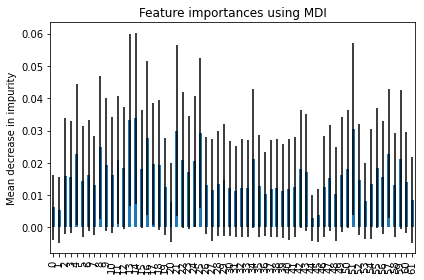

In [435]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=x.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [438]:
importances = clf.feature_importances_
colimportance = pd.Series(importances, index=x.columns)
colimportance.sort_values(ascending=False)

Forest area (% of land area)                                                   0.033804
Fish species, threatened                                                       0.033352
Renewable energy consumption (% of total final energy consumption)             0.030442
Mammal species, threatened                                                     0.029974
Methane emissions in energy sector (thousand metric tons of CO2 equivalent)    0.029262
                                                                                 ...   
Lower secondary school starting age (years)                                    0.007833
Access to electricity (% of population)                                        0.006264
Access to electricity, urban (% of urban population)                           0.005547
Primary school starting age (years)                                            0.003745
Primary education, duration (years)                                            0.002917
Length: 62, dtype: float64

Feature 0: 41.307800
Feature 1: 11.535041
Feature 2: 1151451592824.009521
Feature 3: 124861630254.461563
Feature 4: 52.170584
Feature 5: 15942923.255828
Feature 6: 1678834.730062
Feature 7: 1088764.447305
Feature 8: 538.028829
Feature 9: 24513556.235367
Feature 10: 27175729.593020
Feature 11: 111.097445
Feature 12: 10.326610
Feature 13: 535.742906
Feature 14: 148.404278
Feature 15: 18067117.560861
Feature 16: 17.830419
Feature 17: 17.055168
Feature 18: 561.381269
Feature 19: 36374084.936178
Feature 20: 0.160205
Feature 21: 541.833368
Feature 22: 8029496937262.353516
Feature 23: 7369260252013.634766
Feature 24: 3045704.540593
Feature 25: 1518327.695456
Feature 26: 89.271968
Feature 27: 80.889141
Feature 28: 97.557559
Feature 29: 40.661957
Feature 30: 135.780351
Feature 31: 127.562491
Feature 32: 144.535494
Feature 33: 1470887.316637
Feature 34: 129769.050422
Feature 35: 96925.506222
Feature 36: 132103.090896
Feature 37: 268086.720278
Feature 38: 71049.104498
Feature 39: 982210.975372
Fe

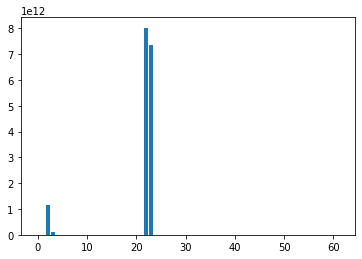

In [483]:
x = newcountries.drop(['Country', 'Cluster'], axis=1)
y = newcountries['Cluster']
fs = SelectKBest(chi2, k='all')
fs.fit_transform(x, y)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()


In [506]:
val = [i for i in list(range(len(fs.scores_))) if fs.scores_[i] > 1000]
len(val)

30

In [492]:
val = [i for i in list(range(len(fs.scores_))) if fs.scores_[i] > 1000]
selectcolumns = x.columns[val]
x = newcountries[selectcolumns]
y = newcountries['Cluster']
clf = RandomForestClassifier(n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=110, bootstrap=False)
clf.fit(x, y)
ypred = clf.predict(x)

In [493]:
importances = clf.feature_importances_
colimportance = pd.Series(importances, index=x.columns)
colimportance.sort_values(ascending=False)

Methane emissions in energy sector (thousand metric tons of CO2 equivalent)          0.054913
Forest area (sq. km)                                                                 0.045138
Total fisheries production (metric tons)                                             0.044119
Methane emissions (kt of CO2 equivalent)                                             0.042662
Capture fisheries production (metric tons)                                           0.041724
Secure Internet servers (per 1 million people)                                       0.041658
Merchandise exports (current US$)                                                    0.041559
Agricultural land (sq. km)                                                           0.037861
Plant species (higher), threatened                                                   0.037718
Population density (people per sq. km of land area)                                  0.036727
Scientific and technical journal articles                   

In [503]:
diff = pd.DataFrame(columns = x.columns, index = range(8))
count = 0
for cluster in newcountries.Cluster.unique():
    countriestemp = x[newcountries.Cluster == cluster]
    diff.iloc[count] = list(countriestemp.mean(axis=0))
    count += 1
print(diff)
stds = list(diff.std(axis=0))
print(stds)
print(np.argsort(stds))
x.columns[np.argsort(stds)]

  Adjusted savings: carbon dioxide damage (current US$)  \
0                                   898138333.986671      
1                                  2410415979.058824      
2                                  25577627560.80455      
3                                 19702376340.438065      
4                                  6653973071.656861      
5                                   4446092293.13225      
6                                 12306722883.176922      
7                                  3680559180.608834      

  Adjusted savings: mineral depletion (current US$)  \
0                                   62785099.831675   
1                                  170897928.888229   
2                                  2049846850.06403   
3                                     236532239.425   
4                                  483414936.113814   
5                                  167515451.007871   
6                                 1013338609.560022   
7                           

Index(['Plant species (higher), threatened',
       'Population density (people per sq. km of land area)',
       'Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)',
       'Number of deaths ages 5-9 years', 'Number of deaths ages 10-14 years',
       'Number of deaths ages 15-19 years',
       'Number of deaths ages 20-24 years',
       'Secure Internet servers (per 1 million people)',
       'Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Number of neonatal deaths',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Scientific and technical journal articles',
       'Methane emissions in energy sector (thousand metric tons of CO2 equivalent)',
       'Number of infant deaths',
       'Agricultural methane emissions (thousand metric tons of CO2 equivalent)',
       'Number of under-five deaths',
       'Methane emissions (kt of CO2 equivalent)', 'Forest area (sq. km)',
       'Agr